In [17]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 


In [6]:
# 데이터 불러오기

bstSeller = pd.read_csv("./최종.csv")

bstSeller.head()

,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,트렌드 코리아 2020,김난도,미래의창,20191024,경제/경영,18000,448,12
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,20191030,인문,16000,392,12
2,지쳤거나 좋아하는 게 없거나,글배우,강한별,20190904,시/에세이,13500,248,12
3,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,20190310,인문,19800,474,12
4,에이트(양장본 HardCover),이지성,차이정원,20191021,자기계발,17000,308,12


In [7]:
# 중복 제거
# bstSeller = bstSeller.drop_duplicates(["도서명"],keep = "first")

In [8]:
bstSeller.info() # 2400-rows, 8-cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도서명     2400 non-null   object
 1   저자명     2400 non-null   object
 2   출판사명    2400 non-null   object
 3   출간일     2400 non-null   int64 
 4   분야      2400 non-null   object
 5   정가      2400 non-null   int64 
 6   쪽수      2400 non-null   int64 
 7   월       2400 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 150.1+ KB


In [9]:
# 제일 비싼 도서와 제일 저렴한 도서
bk_cost=bstSeller.groupby('도서명')['정가'].mean() 
bk_cost.sort_values(ascending=False)

도서명
금융 위기 템플릿(레이 달리오의)(전3권)                 43000
이윤기의 그리스 로마 신화(특별합본판)(양장본 HardCover)    39800
유러피언                                    38000
자본과 이데올로기(양장본 HardCover)                38000
서양미술사                                   38000
                                        ...  
열혈강호. 81                                 4500
소설 보다: 가을 2020                           3500
소설 보다: 봄 2020                            3500
소설 보다: 여름 2020                           3500
부동산과 세금(2020)                            2000
Name: 정가, Length: 889, dtype: int64

In [10]:
# 분야 : 범주형 -> 이진수
field_1 = pd.get_dummies(bstSeller['분야'])

# '분야' category 삭제
bstSeller = bstSeller.drop('분야', axis = 1)
field_1


,가정/육아,건강,경제/경영,과학,기술/공학,만화,소설,시/에세이,어린이(초등),여행,...,예술/대중문화,외국어,요리,유아(0~7세),인문,자기계발,정치/사회,종교,취미/실용/스포츠,컴퓨터/IT
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 새로 만든 분야 합체
bstSeller = bstSeller.join(field_1)
bstSeller

,도서명,저자명,출판사명,출간일,정가,쪽수,월,가정/육아,건강,경제/경영,...,예술/대중문화,외국어,요리,유아(0~7세),인문,자기계발,정치/사회,종교,취미/실용/스포츠,컴퓨터/IT
0,트렌드 코리아 2020,김난도,미래의창,20191024,18000,448,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,20191030,16000,392,12,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,지쳤거나 좋아하는 게 없거나,글배우,강한별,20190904,13500,248,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,20190310,19800,474,12,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,에이트(양장본 HardCover),이지성,차이정원,20191021,17000,308,12,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,해커스어학연구소,20200417,19500,596,11,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2396,인간 실격(세계문학전집 103),다자이 오사무,민음사,20120410,8000,192,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,주식 네 이놈. 2: 기법편,문제룡,지서연,20201121,20000,292,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2398,어린이 명심보감(읽으면서 바로 써먹는)(맛있는 공부 33),한날,파란정원,20200915,12000,224,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 출판사 : 범주형 -> 이진수
publisher_1 = pd.get_dummies(bstSeller['출판사명'])

# '출판사' category 삭제
bstSeller = bstSeller.drop('출판사명', axis = 1)

# 새로 만든 출판사 합체
bstSeller = bstSeller.join(publisher_1)
bstSeller

,도서명,저자명,출간일,정가,쪽수,월,가정/육아,건강,경제/경영,과학,...,홍익출판사,황소북스,후마니타스,휘선,휴머니스트,휴먼큐브,흐름출판,흔,힘찬북,힘찬북스
0,트렌드 코리아 2020,김난도,20191024,18000,448,12,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,20191030,16000,392,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,지쳤거나 좋아하는 게 없거나,글배우,20190904,13500,248,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,팩트풀니스(양장본 HardCover),한스 로슬링,20190310,19800,474,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,에이트(양장본 HardCover),이지성,20191021,17000,308,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,20200417,19500,596,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,인간 실격(세계문학전집 103),다자이 오사무,20120410,8000,192,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,주식 네 이놈. 2: 기법편,문제룡,20201121,20000,292,11,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2398,어린이 명심보감(읽으면서 바로 써먹는)(맛있는 공부 33),한날,20200915,12000,224,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **가장 다수 분포된 가격**

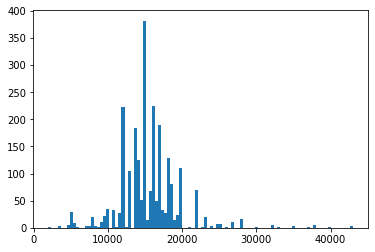

In [14]:
plt.hist(bstSeller['정가'],bins=100)
plt.show()

## **가격과 쪽수의 상관관계 - 쪽수가 증가할수록 가격도 증가하는가?
즉, 쪽수(독립변수)가 정가(종속변수)에 미치는 영향**

In [18]:
# 단순회귀분석
model = smf.ols(formula = '정가 ~ 쪽수', data = bstSeller)
result = model.fit()
result.summary() # 결과해석 순서 : 결정계수 확인 -> 모형의 적합도 확인 -> 회귀계수 확인 -> t값과 t값의 유의확률

# r-squared 값이 0.445로 설명력이 44.5% 설명력이 조금 낮다.
# F값이 1922, 유의확률은 0.000으로 통계적으로 유의미함.
# 결과 중 Intercept(절편)의 t값은 61.022, P>|t|값은 0.000으로 이 회귀모형의 절편값은 유의한 것으로 나타났으며 그 값은 9383.6391으로 나타났다.
# 쪽수의 t값은 43.843, P>|t|값은 0.000으로 쪽수도 유의하여 쪽수의 계수는 18.4055으로 도출됐다. 

# 즉, 1쪽이 증가할수록 정가가 18.4055원 증가한다는 뜻이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     정가   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     1922.
Date:                Thu, 11 Feb 2021   Prob (F-statistic):          7.27e-309
Time:                        23:47:44   Log-Likelihood:                -22648.
No. Observations:                2400   AIC:                         4.530e+04
Df Residuals:                    2398   BIC:                         4.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9383.6391    153.774     61.022      0.000    9082.095    9685.183
쪽수            18.4055      0.420     43.843      0.000      17.582      19.229
==============================================================================
Omnibus:                      523.245   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6588.943
Skew:                           0.661   Prob(JB):                         0.00
Kurtosis:                      11.009   Cond. No.                         909.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **분야와 월의 상관관계
과연 계절마다 선호하는 분야가 다를까?
12 1 2, 3 4 5, 6 7 8, 9 10 11 로 나누어서 분야별 개수를 판단.**

In [19]:
# 데이터 불러오기

bstSeller = pd.read_csv("./최종.csv")

bstSeller.head()

,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,트렌드 코리아 2020,김난도,미래의창,20191024,경제/경영,18000,448,12
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,20191030,인문,16000,392,12
2,지쳤거나 좋아하는 게 없거나,글배우,강한별,20190904,시/에세이,13500,248,12
3,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,20190310,인문,19800,474,12
4,에이트(양장본 HardCover),이지성,차이정원,20191021,자기계발,17000,308,12


In [20]:
is_month_wnt = bstSeller[bstSeller['월'] == 12]
is_month_wnt = is_month_wnt.append(bstSeller[bstSeller['월'] == 1],ignore_index=True)
is_month_wnt = is_month_wnt.append(bstSeller[bstSeller['월'] == 2],ignore_index=True)
is_month_wnt['분야'].value_counts()

경제/경영       89
시/에세이       82
소설          79
인문          76
자기계발        60
어린이(초등)     56
외국어         42
역사/문화       21
정치/사회       15
과학          15
유아(0~7세)    13
만화          12
건강          11
가정/육아       11
예술/대중문화     10
컴퓨터/IT       3
요리           2
종교           2
기술/공학        1
Name: 분야, dtype: int64

In [21]:
is_month_spr = bstSeller[bstSeller['월'] == 3]
is_month_spr = is_month_spr.append(bstSeller[bstSeller['월'] == 4],ignore_index=True)
is_month_spr = is_month_spr.append(bstSeller[bstSeller['월'] == 5],ignore_index=True)
is_month_spr['분야'].value_counts()

소설          102
경제/경영        93
시/에세이        70
인문           68
자기계발         67
어린이(초등)      56
외국어          25
과학           22
정치/사회        20
역사/문화        14
만화           13
가정/육아        11
유아(0~7세)     10
예술/대중문화       9
건강            8
요리            6
종교            2
컴퓨터/IT        2
기술/공학         1
여행            1
Name: 분야, dtype: int64

In [22]:
is_month_summ = bstSeller[bstSeller['월'] == 6]
is_month_summ = is_month_summ.append(bstSeller[bstSeller['월'] == 7],ignore_index=True)
is_month_summ = is_month_summ.append(bstSeller[bstSeller['월'] == 8],ignore_index=True)
is_month_summ['분야'].value_counts()

경제/경영       98
소설          90
시/에세이       85
인문          70
자기계발        60
어린이(초등)     56
외국어         28
정치/사회       23
만화          17
역사/문화       17
과학          14
건강          10
가정/육아        9
유아(0~7세)     9
요리           6
예술/대중문화      4
컴퓨터/IT       3
여행           1
Name: 분야, dtype: int64

In [23]:
is_month_fall = bstSeller[bstSeller['월'] == 9]
is_month_fall = is_month_fall.append(bstSeller[bstSeller['월'] == 10],ignore_index=True)
is_month_fall = is_month_fall.append(bstSeller[bstSeller['월'] == 11],ignore_index=True)
is_month_fall['분야'].value_counts()

경제/경영        106
소설            85
시/에세이         84
인문            79
자기계발          64
어린이(초등)       60
외국어           20
정치/사회         19
만화            16
과학            13
역사/문화         13
가정/육아          9
유아(0~7세)       8
컴퓨터/IT         6
예술/대중문화        6
건강             5
요리             4
기술/공학          1
취미/실용/스포츠      1
종교             1
Name: 분야, dtype: int64

## **오래된 책 vs 최신의 책**

In [24]:
# 출간일 : 연도 추출
year = bstSeller['출간일']
print(year)

for i in range(len(year)):
  tmp = year.loc[i]//10000
  year.loc[i] = tmp

print(year)
# '출간일' category 삭제
bstSeller = bstSeller.drop('출간일', axis = 1)

# 새로 만든 출판사 합체
bstSeller = bstSeller.join(year)
bstSeller

0       20191024
1       20191030
2       20190904
3       20190310
4       20191021
          ...   
2395    20200417
2396    20120410
2397    20201121
2398    20200915
2399    20190110
Name: 출간일, Length: 2400, dtype: int64


c:\users\namuj\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2395    2020
2396    2012
2397    2020
2398    2020
2399    2019
Name: 출간일, Length: 2400, dtype: int64


,도서명,저자명,출판사명,분야,정가,쪽수,월,출간일
0,트렌드 코리아 2020,김난도,미래의창,경제/경영,18000,448,12,2019
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,인문,16000,392,12,2019
2,지쳤거나 좋아하는 게 없거나,글배우,강한별,시/에세이,13500,248,12,2019
3,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,인문,19800,474,12,2019
4,에이트(양장본 HardCover),이지성,차이정원,자기계발,17000,308,12,2019
...,...,...,...,...,...,...,...,...
2395,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,해커스어학연구소,외국어,19500,596,11,2020
2396,인간 실격(세계문학전집 103),다자이 오사무,민음사,소설,8000,192,11,2012
2397,주식 네 이놈. 2: 기법편,문제룡,지서연,경제/경영,20000,292,11,2020
2398,어린이 명심보감(읽으면서 바로 써먹는)(맛있는 공부 33),한날,파란정원,어린이(초등),12000,224,11,2020
